## FOOD RETAIL PRICE  PREDICTION 

#### Problem Statatement

The dataset contains information about retail prices of food like. The data captures weekly as well as monthly prices across different states and important/major 
districts/market centers. We need to predict the retail price of food commodities.  

**Import Modules**

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

**Import Food Dataset**

In [2]:
food=pd.read_csv('Monthly_Food_Retail_Prices.csv')
food.head()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,NaN


In [3]:
food.shape

(1147446, 8)

There are 11,47,446 rows and 8 columns.

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147446 entries, 0 to 1147445
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   State         1147446 non-null  object 
 1   Centre        1147446 non-null  object 
 2   Commodity     1137726 non-null  object 
 3   Variety       941868 non-null   object 
 4   Unit          1147446 non-null  object 
 5   Category      1147446 non-null  object 
 6   Date          1147446 non-null  object 
 7   Retail Price  578525 non-null   float64
dtypes: float64(1), object(7)
memory usage: 70.0+ MB


* We have 11,47,446 rows & some null values present. 
* All the attributes have Object datatype except the Retail Price having the float datatype

In [ ]:
food.describe()

,Retail Price
count,578525.000000
mean,79.691448
std,148.780859
min,0.500000
25%,18.000000
50%,35.000000
75%,80.000000
max,20045.000000


Retail Price varies from 0.50 to 20045 

**Data Cleaning**

In [5]:
# splitting the Date column into Month & Year
food[["Month","Year"]] = food['Date'].str.split('-', n = 1, expand = True)

def split_Date(val):
    mon = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9,'OCT':10, 'NOV':11, 'DEC':12}
    return mon[val]

food["Month"] = food["Month"].apply(split_Date)

In [6]:
food.head()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.0,1,2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.0,1,2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.5,1,2001
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,NaN,1,2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,NaN,1,2001


**Dropping Unwanted Columns**

In [7]:
food.drop(['Category'], axis = 1, inplace = True)

In [8]:
food.drop(['Date'], axis = 1, inplace = True)

In [9]:
food.head()

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,24.0,1,2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,26.0,1,2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,25.5,1,2001
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,NaN,1,2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,NaN,1,2001


**Checking for Null Values**

In [10]:
food.isna().sum()

State                0
Centre               0
Commodity         9720
Variety         205578
Unit                 0
Retail Price    568921
Month                0
Year                 0
dtype: int64

In [11]:
food.isna().mean().round(4)*100 

State            0.00
Centre           0.00
Commodity        0.85
Variety         17.92
Unit             0.00
Retail Price    49.58
Month            0.00
Year             0.00
dtype: float64

In [12]:
food['Variety'].mode()

0    FAQ
dtype: object

In [13]:
foodmode=food['Variety'].mode()[0]

In [14]:
food['Variety'].fillna(foodmode, inplace=True)

In [15]:
foodmean=food['Retail Price'].mean()

In [16]:
food['Retail Price'].fillna(foodmean, inplace=True)

In [17]:
food.isna().sum()

State              0
Centre             0
Commodity       9720
Variety            0
Unit               0
Retail Price       0
Month              0
Year               0
dtype: int64

In [18]:
food.dropna(inplace = True)

In [19]:
food.isna().sum()

State           0
Centre          0
Commodity       0
Variety         0
Unit            0
Retail Price    0
Month           0
Year            0
dtype: int64

**Checking for Duplicates**

In [21]:
food.duplicated().sum()

0

There are no duplicates in the dataset

In [22]:
food.shape

(1137726, 8)

**EDA**

In [ ]:
#value count for each column
for i in food.columns:
    print("Column Name", i, "\n", "\n", food[i].value_counts())

Column Name State 
 
 Uttar Pradesh        56884
Rajasthan            46619
Tamil Nadu           45198
Andhra Pradesh       41062
Kerala               33339
West Bengal          30509
Karnataka            27542
Madhya Pradesh       26949
Maharashtra          23347
Orissa               21122
Assam                20884
Gujarat              20337
Punjab               18688
Jharkhand            17393
Bihar                17086
Haryana              15154
Telangana            11853
Jammu Kashmir        11423
Union Territories    11252
Himachal Pradesh     10598
Goa                  10444
National Capital      9708
Meghalaya             9583
Mizoram               9497
Tripura               9111
Manipur               6149
Nagaland              5616
Arunachal Pradesh     3065
Uttarakhand           1983
Sikkim                1349
Name: State, dtype: int64
Column Name Centre 
 
 Chittoor       12235
Hyderabad      11853
Khozhikode     11494
Patna          11488
Gorakhpur      11322
              

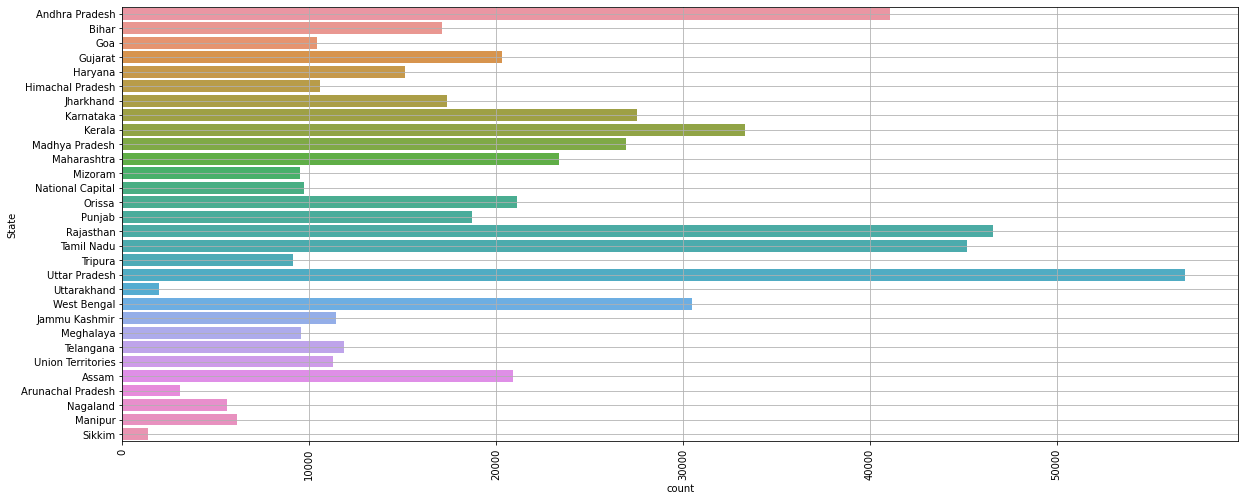

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=food, y='State')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

From above graph we see that state Uttar Pradesh, have highest sale in Food

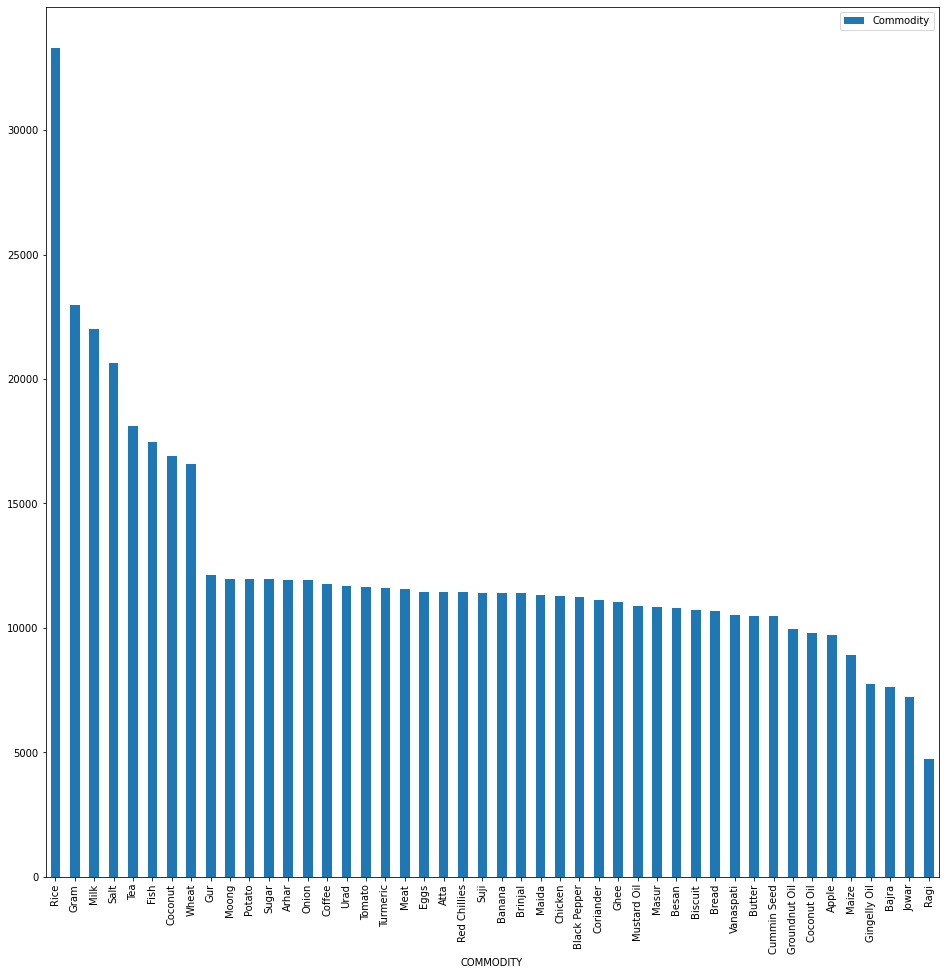

In [ ]:
plt.figure(figsize=(16,16))
food['Commodity'].value_counts().plot(kind="bar")
plt.xlabel("COMMODITY")
plt.legend()
plt.show()

Rice commodity has the higest sale and the least sale is for Ragi

In [28]:
Rices=food[food["Commodity"]=='Rice'].sort_values(by="State",ascending=False)
Rices.head()

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
304454,West Bengal,Malda,Rice,Fine,Kg.,36.000000,3,2021
271813,West Bengal,Asansol,Rice,Superfine,Kg.,41.000000,1,2019
190241,West Bengal,Howrah,Rice,Superfine,Kg.,79.691448,8,2013
190240,West Bengal,Howrah,Rice,Fine,Kg.,79.691448,8,2013
190239,West Bengal,Howrah,Rice,Common/Coarse,Kg.,79.691448,8,2013


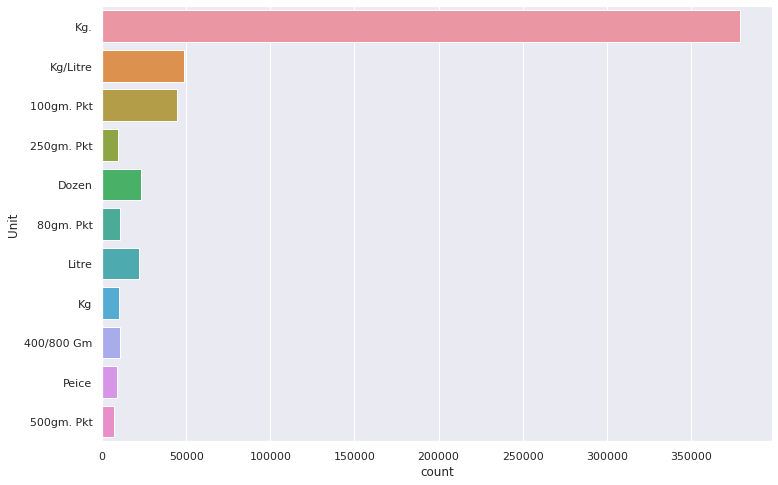

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
x=sns.countplot(y='Unit',data=food)

Among all the units Kg is the most used unit to measure

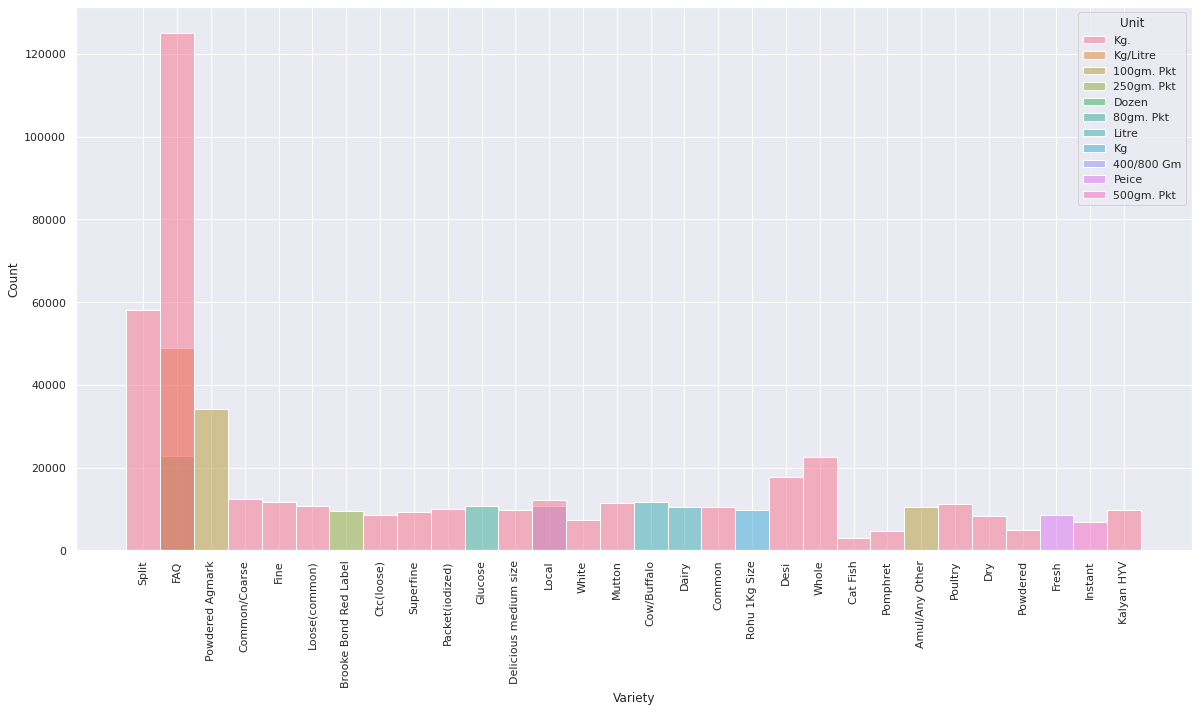

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=food,x='Variety', hue='Unit')
plt.xticks(rotation=90)
plt.show()

* Most of the Variety use Kg as unit 
* Amul and Powdered Agmark uses 100gm.Pkt
* Fresh uses Peice to measure 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


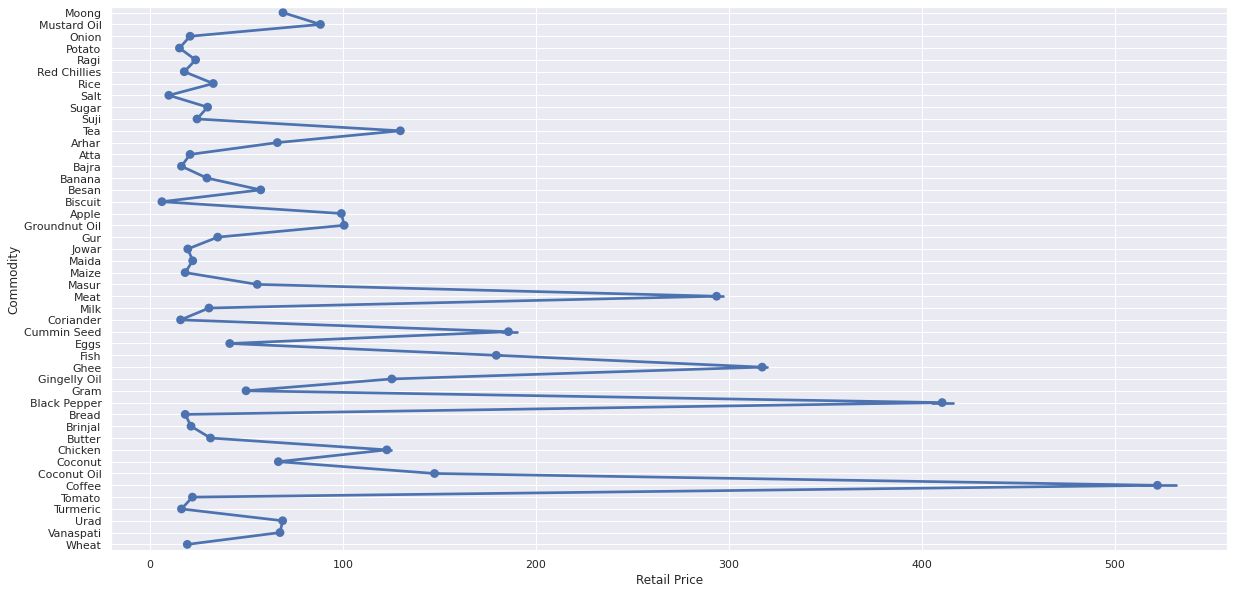

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(food["Retail Price"], food["Commodity"])
plt.grid(True)
plt.show()

Coffee has the higest Retail Price.
Biscuit and Salt price is lower.

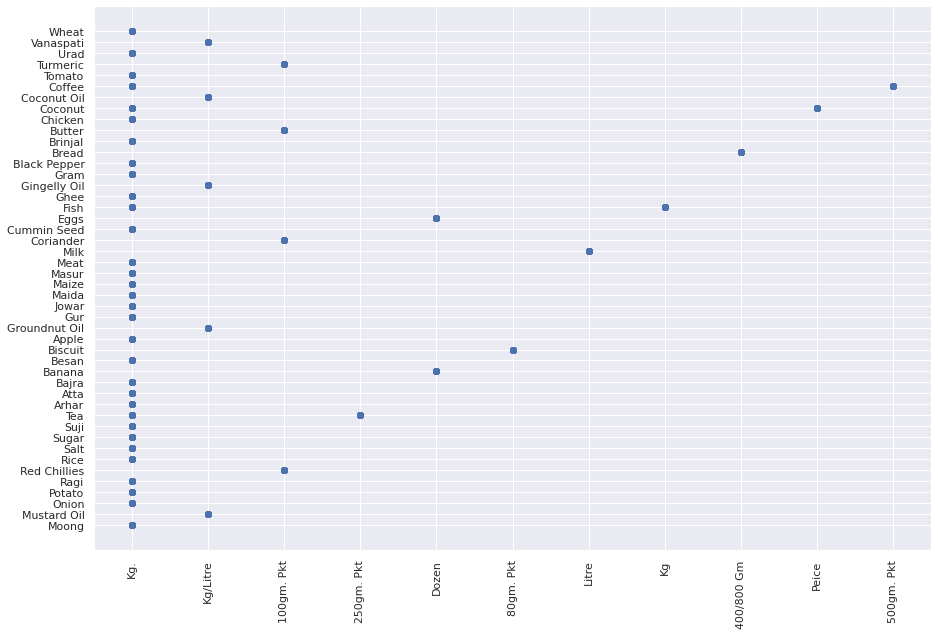

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data=food,y="Commodity",x="Unit")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

* Most of the commodity uses unit Kg to measure. 
* Coffee is measured with Kg as well as 500gm.Pkt.
* Milk is measured with Litre. 
* Banana is measured with Dozen

In [ ]:
group=food.groupby(["Variety","Commodity"]).mean().head(20)
group

,,Retail Price,Month
Variety,Commodity,,
Amul/Any Other,Butter,31.462188,6.392129
Brooke Bond Red Label,Tea,77.009560,6.388895
Cat Fish,Fish,200.257411,6.400389
Common,Cummin Seed,185.811712,6.396239
Common/Coarse,Rice,21.772218,6.382188
Cow/Buffalo,Milk,30.914796,6.378434
Ctc(loose),Tea,188.618350,6.424288
Dairy,Milk,30.386566,6.393540
Delicious medium size,Apple,99.264003,6.427512


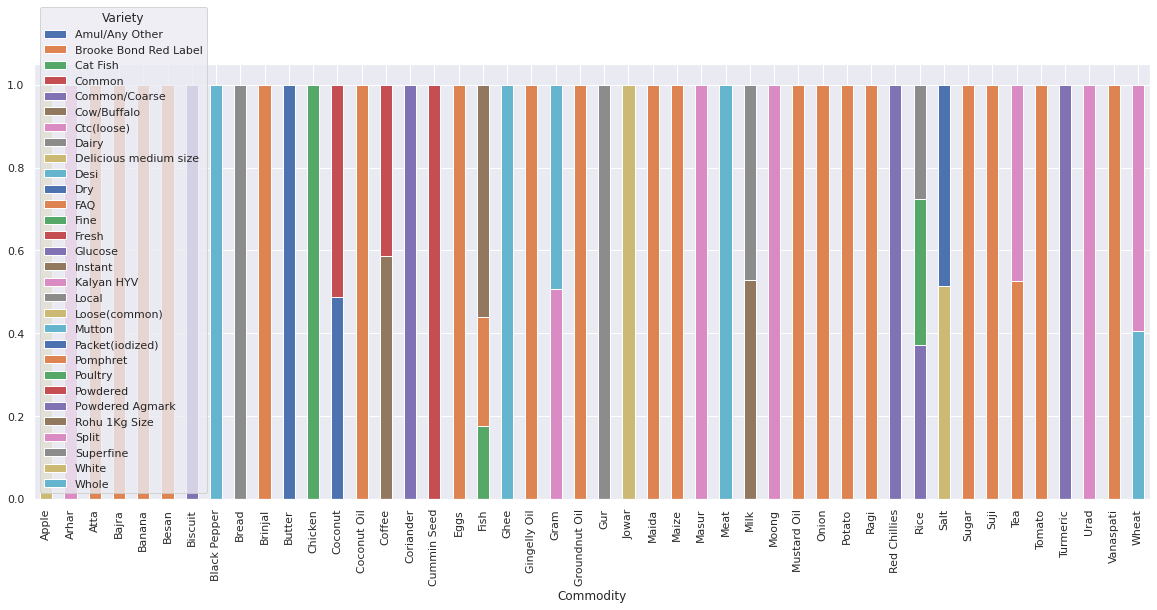

In [ ]:
Self_Employed = pd.crosstab(food['Commodity'], food['Variety'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

The above graph interprets the commodity and the different form of Variety they have.
* Commodities such as Onion, Potato, Ragi Tomato, Maize, Brinjal, Aata, Bajra, Banana has FAQ as Variety. 
* Commodities such as Red Chillies, Tumeric, Coriander are in to Powdered Agmark 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


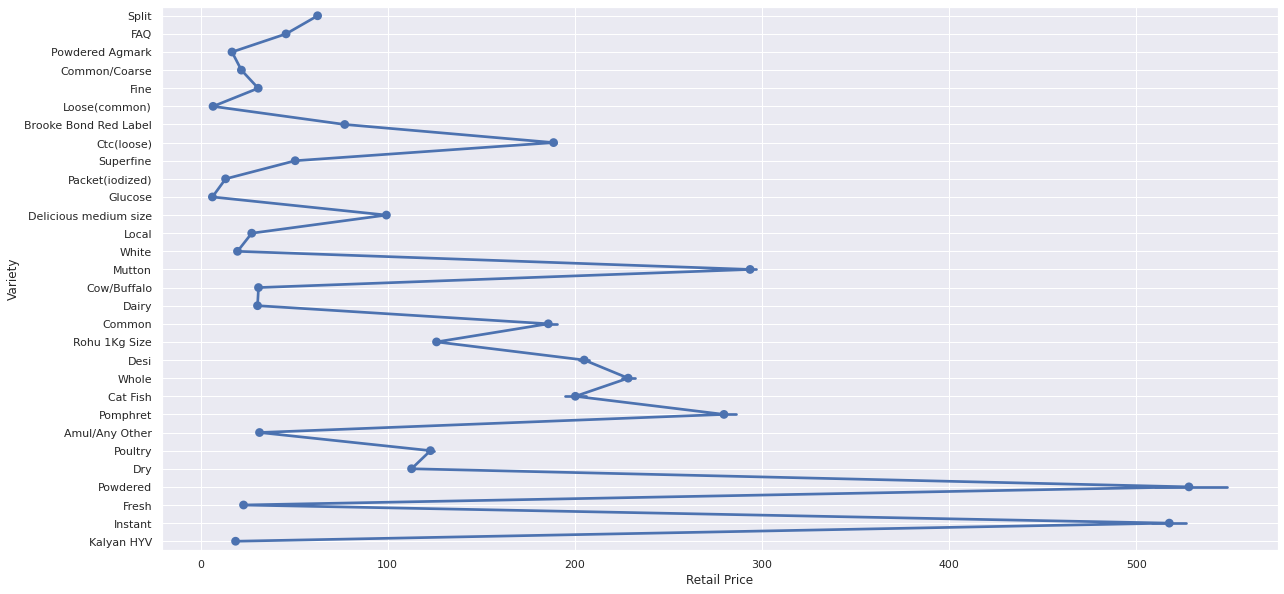

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(food["Retail Price"], food["Variety"])
plt.grid(True)
plt.show()

* Powered and instant has the higest Retail Price ie greater than 500
* Loose and Glucose has the least Retail Price ie less than 10

<Figure size 576x1080 with 0 Axes>

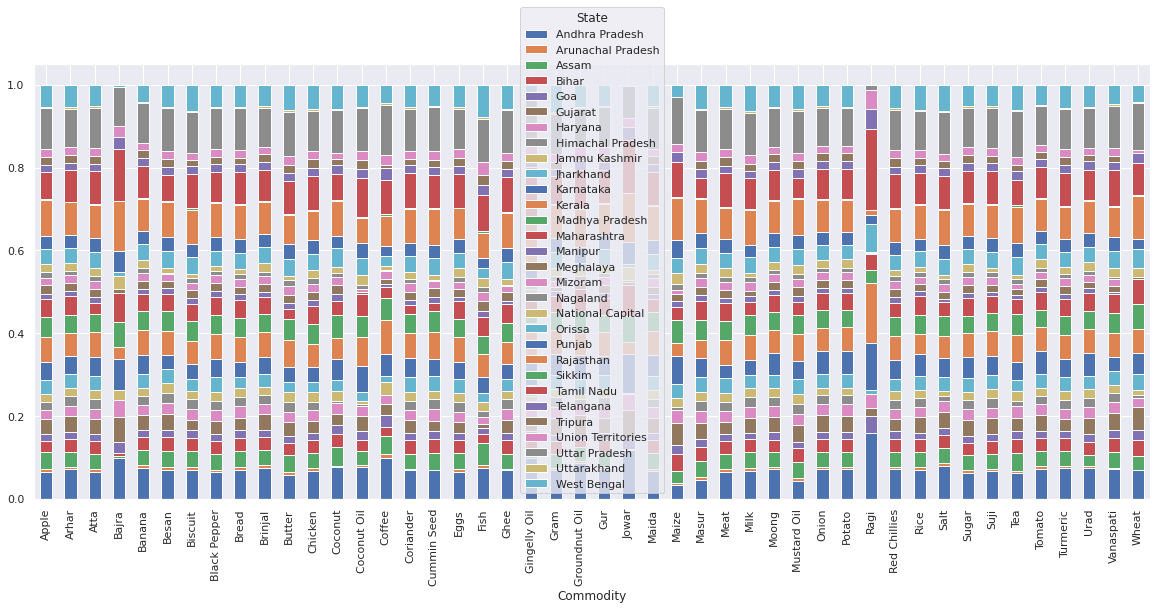

In [ ]:
plt.figure(figsize=(8,15))
Self_Employed = pd.crosstab(food['Commodity'], food['State'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (20, 8))

Above plot interprets that, Ragi was least sold in state Madhya Pradesh and Orissa. Whereas it had the higest sale in Punjab, Bihar and Kerla

In [24]:
Rices=food[food["Retail Price"]<1].sort_values(by="State",ascending=False)
Rices.head(5)

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
68576,Kerala,Ernakulam,Salt,Loose(common),Kg.,0.5,7,2005


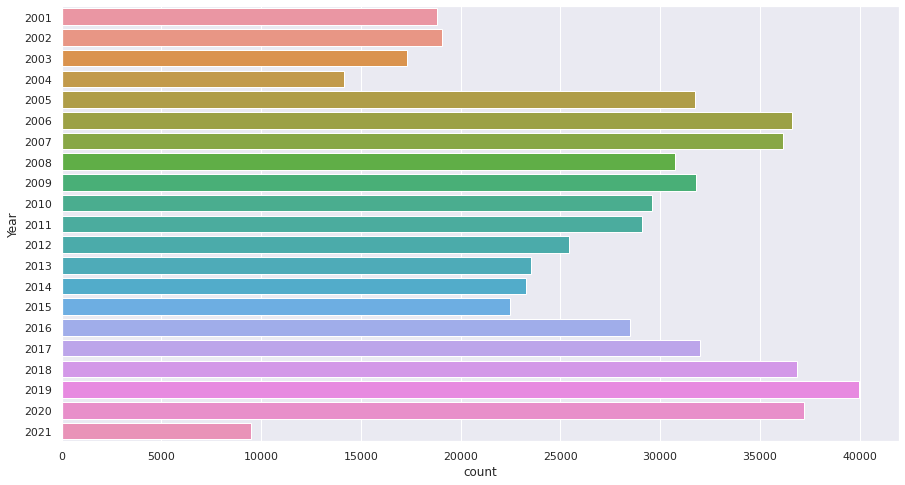

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=food, y='Year')

Year 2019 has Higest sale more than 30,000 whereas in 2021 there is a measure drop in sales less than 10,000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


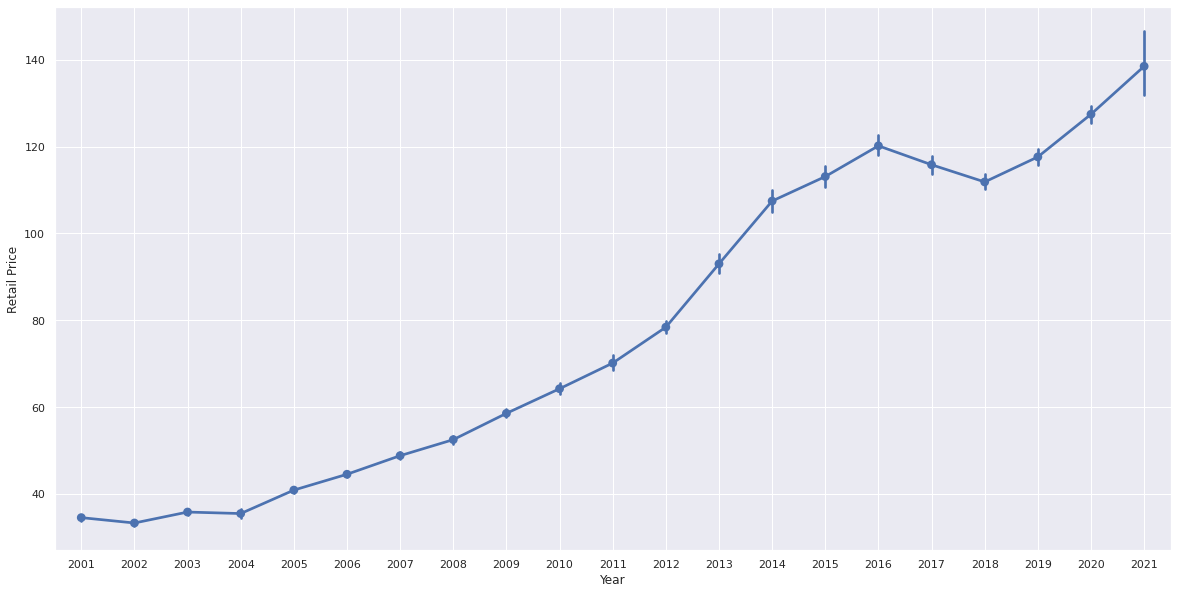

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(food["Year"], food["Retail Price"])
plt.grid(True)
plt.show()

There is significiant growth in retail price since year 2018. Least price was in year 2002.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


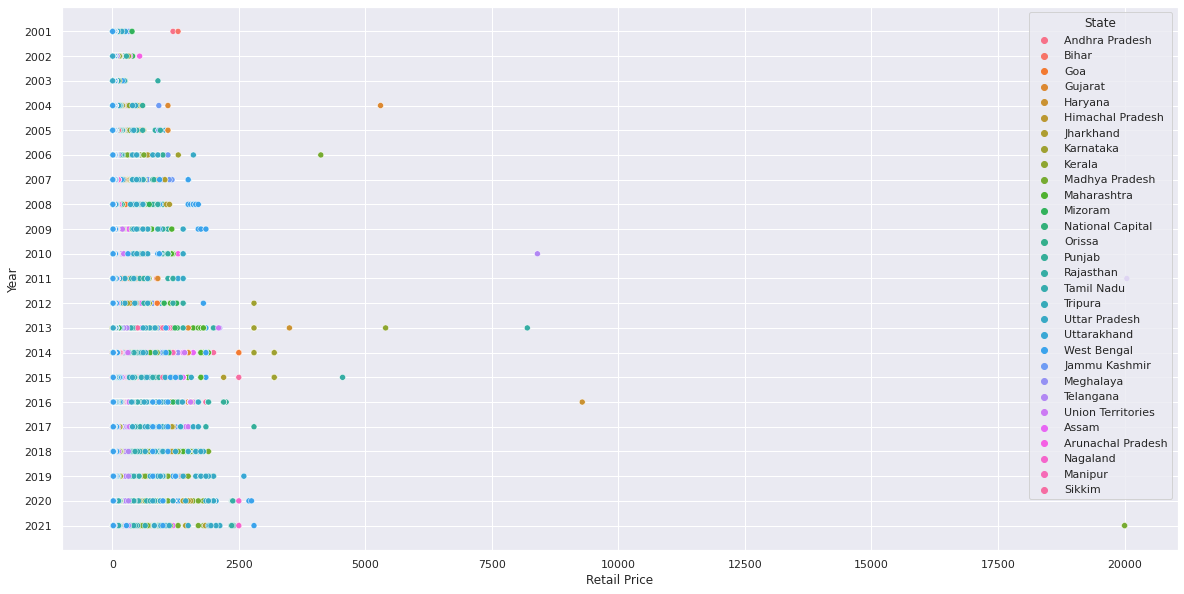

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=food,y='Year',x="Retail Price",hue="State")
plt.grid(True)
plt.plot()
plt.show()

**Checking for skewness**

In [29]:
from scipy.stats import skew

In [33]:
skew(food['Retail Price'])

26.003756315775178

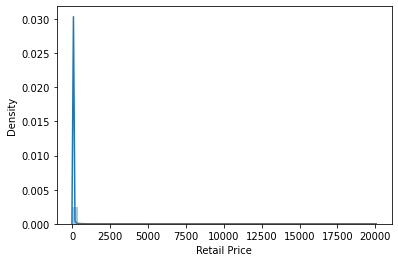

In [32]:
sns.distplot(food['Retail Price'])

In [34]:
food["Retail Price"]=np.sqrt(food["Retail Price"])

In [36]:
skew(food['Retail Price'])

2.5658361506286034

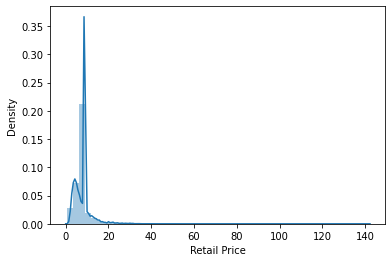

In [35]:
sns.distplot(food['Retail Price'])

**Encoding**

In [37]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

food['State']  = lb.fit_transform(food['State'])
food['Centre'] = lb.fit_transform(food['Centre'])
food['Commodity'] = lb.fit_transform(food['Commodity'])
food['Variety'] = lb.fit_transform(food['Variety'])
food['Unit'] = lb.fit_transform(food['Unit'])

In [38]:
x = food.drop(columns = ['Retail Price'])
y = food['Retail Price']

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [47]:
ann = Sequential()

ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=1))

ann.compile(optimizer="adam", loss="mse")

from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
ann.fit(xtrain, ytrain, epochs=200, validation_data=(xtest, ytest), callbacks=[earlystop])

Epoch 1/200
24888/24888 [==============================] - 38s 2ms/step - loss: 12.3681 - val_loss: 10.6751
Epoch 2/200
24888/24888 [==============================] - 35s 1ms/step - loss: 9.9703 - val_loss: 9.5972
Epoch 3/200
24888/24888 [==============================] - 37s 2ms/step - loss: 9.6378 - val_loss: 9.5313
Epoch 4/200
24888/24888 [==============================] - 35s 1ms/step - loss: 9.6250 - val_loss: 9.5437
Epoch 5/200
24888/24888 [==============================] - 38s 2ms/step - loss: 9.6181 - val_loss: 9.5096
Epoch 6/200
24888/24888 [==============================] - 35s 1ms/step - loss: 9.5609 - val_loss: 9.4511
Epoch 7/200
24888/24888 [==============================] - 38s 2ms/step - loss: 9.5427 - val_loss: 9.4533
Epoch 8/200
24888/24888 [==============================] - 37s 1ms/step - loss: 9.5342 - val_loss: 9.5294
Epoch 9/200
24888/24888 [==============================] - 37s 2ms/step - loss: 9.5317 - val_loss: 9.4399
Epoch 10/200
24888/24888 [==================

In [48]:
ann.evaluate(xtrain,ytrain)

24888/24888 [==============================] - 23s 904us/step - loss: 8.3154


8.315384864807129

In [49]:
ann.evaluate(xtest,ytest)

10667/10667 [==============================] - 10s 914us/step - loss: 8.2409


8.240917205810547

In [52]:
ypred=ann.predict(xtest)

In [56]:
from sklearn.metrics import mean_squared_error
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")

MSE : 8.240913684881306
RMSE : 2.870699163075314


**Saving the Model**

In [58]:
from tensorflow.keras.models import load_model
ann.save("ANN_FOOD")

INFO:tensorflow:Assets written to: ANN_FOOD/assets


**Conclusion:**

* There is significant growth in retail price since year 2018. Least price was in year 2002.
* Coffee has the highest Retail Price.
* In year 2019 there has been a  highest sale more than 30,000 whereas in 2021 there is a measure drop in 
sales less than 10,000.
* Most of the commodity uses unit Kg to measure